In [1]:
import igraph as ig
import leidenalg as la #https://leidenalg.readthedocs.io/en/latest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from igraph import Graph #https://python.igraph.org/en/stable/install.html
from modwt import modwt, modwtmra
from scipy.stats import t
from fMRI_pearson import fMRISeq
from sklearn.metrics import normalized_mutual_info_score as NMI
import pickle

In [2]:
# load data
data = loadmat(r"E:\NS\Primate fMRI\data\awake_fmri")['awake_fmri']
data00 = data[0,0]
seq00  = fMRISeq(data00,l_window=20,step=20)
seq00_wt = seq00.Modwt(level = 1)
seq00.time_seq_wt = seq00.time_seq


In [3]:

MSC_mat = seq00.calc_MSC()
#MSC_mat = seq00.welch_MSC()


  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:46<00:00,  4.23s/it]


In [4]:
seq00.save_results(r"E:\NS\Primate fMRI\community\results\l40_s40_0_0.pkl")

In [5]:
seq00=seq00.load_results(r"E:\NS\Primate fMRI\community\results\l40_s40_0_0.pkl")

In [6]:

membership_array = seq00.cluster_MSC(resolution_parameter = 1,pval = True,max_communities=0,seed = 8192,consider_empty_community = True,interslice_weight = 1)
np.max(membership_array)+1
# plt.figure(figsize=(10,10))
# n_clusters =np.max(membership_array)+1
# color_list = sns.color_palette('hls', n_clusters)
# heatmap = sns.heatmap(membership_array, cmap=color_list, vmin=0, vmax=n_clusters-1, yticklabels=5)

4

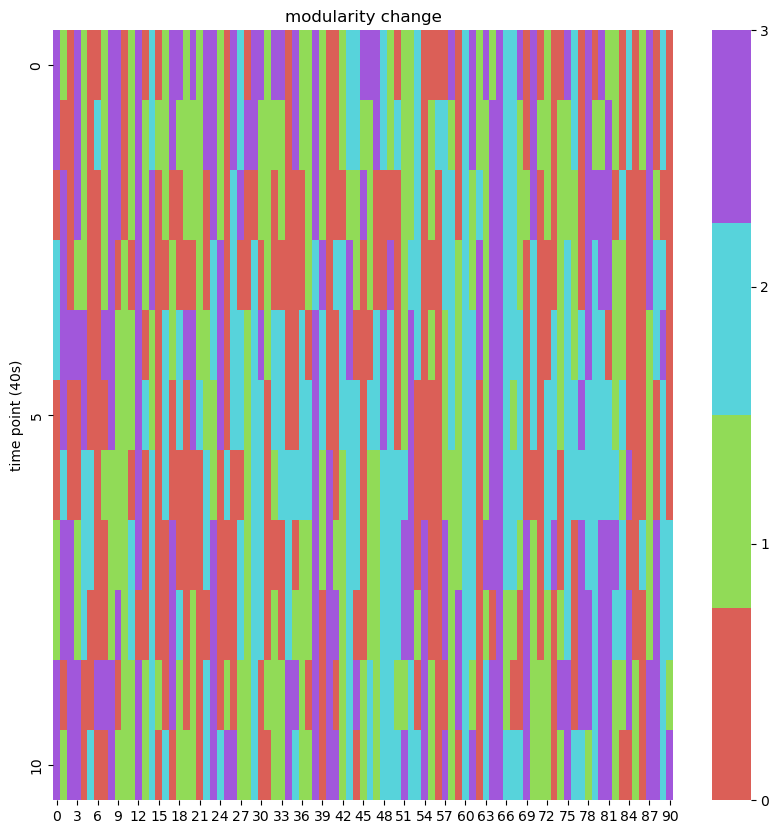

In [7]:
membership_dicts = seq00.visualize_all()
seq00.plot_cluster()

In [8]:
import json
for membership_dict in membership_dicts:
    print(str(membership_dict).replace("'",'"'))

{"SUB": 3, "TEOm": 1, "13": 0, "TEpd": 3, "LB": 1, "11": 0, "7B": 0, "F5": 1, "V3A": 3, "V6A": 3, "31": 0, "VIP": 1, "V3": 3, "F1": 0, "STPi": 2, "23": 0, "AIP": 1, "TEpv": 3, "SII": 3, "V4t": 1, "MST": 3, "3": 1, "TEav": 3, "V1": 3, "MT": 1, "ProSt": 0, "PERI": 3, "9-46v": 2, "MIP": 0, "44": 3, "PBc": 3, "1": 1, "7A": 3, "5": 3, "10": 0, "TEam-a": 3, "OPRO": 1, "7op": 1, "V2": 3, "2": 1, "Core": 0, "9-46d": 0, "ProM": 1, "STPc": 2, "24a": 2, "F2": 3, "DP": 3, "LIP": 3, "PBr": 2, "PIR": 1, "46v": 0, "OPAI": 1, "MB": 1, "32": 2, "12": 0, "F3": 0, "V6": 0, "8B": 0, "INS": 3, "24c": 0, "PGa": 2, "45B": 3, "F4": 1, "Pi": 3, "TEO": 1, "V4": 3, "F6": 2, "14": 2, "25": 3, "46d": 0, "TEad": 3, "45A": 0, "STPr": 1, "24d": 0, "TPt": 0, "8l": 3, "24b": 2, "29-30": 0, "IPa": 3, "ENTO": 0, "8m": 3, "TEam-p": 1, "Gu": 1, "F7": 0, "TH-TF": 2, "7m": 0, "POLE": 1, "PIP": 3, "8r": 0, "FST": 2, "9": 0}
{"SUB": 3, "TEOm": 0, "13": 0, "TEpd": 3, "LB": 1, "11": 0, "7B": 2, "F5": 1, "V3A": 3, "V6A": 3, "31":

<AxesSubplot:>

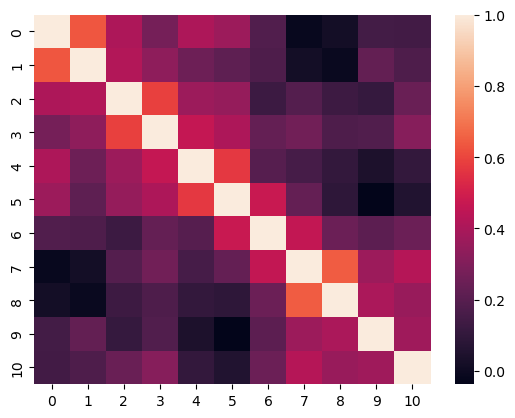

In [9]:
cor_comm = np.corrcoef(membership_array)
sns.heatmap(cor_comm)

In [10]:
resolution_range = np.linspace(0.8,2,10)
temp_Q_list = []
for r in resolution_range:
    seq00.cluster_MSC(resolution_parameter=r,pval=True)
    temp_Q_list.append(seq00.temp_Q/seq00.n_window)

Text(0, 0.5, 'Modularity (Q)')

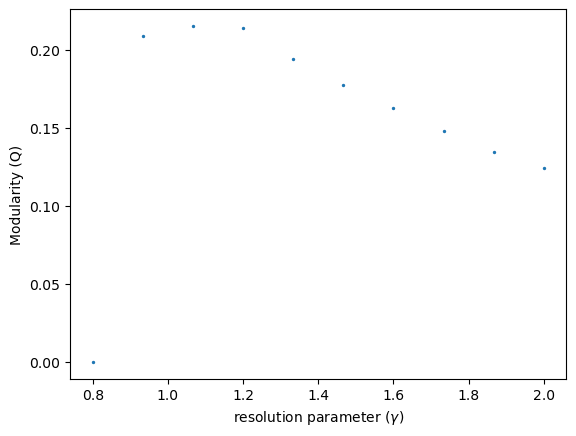

In [11]:
plt.scatter(resolution_range,temp_Q_list,s = 2)
plt.xlabel(r"resolution parameter ($\gamma$)")
plt.ylabel("Modularity (Q)")

In [12]:
T_array = seq00.modular_allegiance_matrix()
np.linalg.norm(T_array[18,:,:]-T_array[2,:,:],ord = 1)

IndexError: index 18 is out of bounds for axis 0 with size 11

<AxesSubplot:>

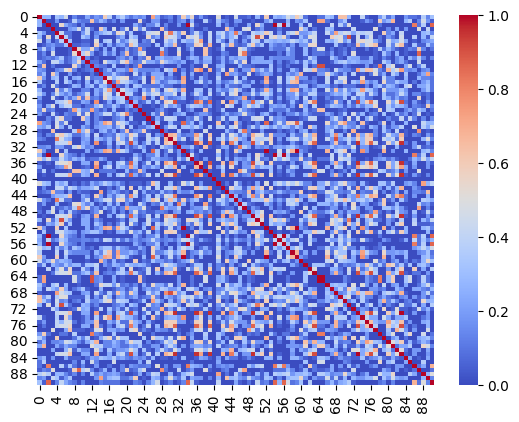

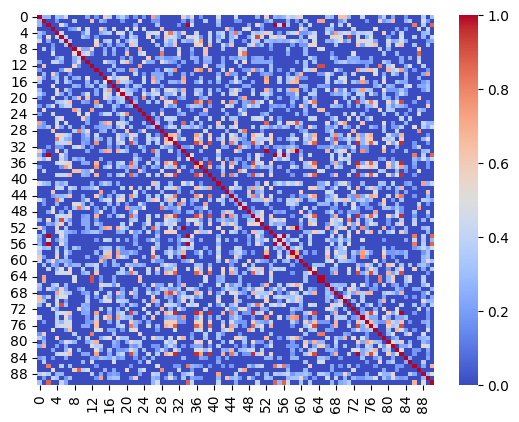

In [ ]:
T_array_mean = np.mean(T_array,axis = 0)
sns.heatmap(T_array_mean,cmap = "coolwarm")
T_array_thresh = T_array_mean.copy()
T_array_thresh[T_array_mean<1/7] = 0
plt.figure()
sns.heatmap(T_array_thresh,cmap = "coolwarm")

<AxesSubplot:>

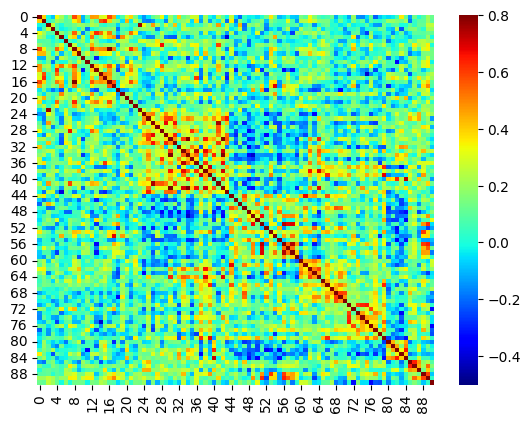

In [ ]:
cor_mat = seq00.cal_corcoeff_mat(wavelet_transform=True)
cor_mat_mean = np.mean(cor_mat,axis = 0)
cor_mat_mean_rearrange = cor_mat_mean.copy()
membership_order = [90,41,44,27,50,51,53,22,54,57,59,66,67,34,69,88,2,86,83,68,77,5,71,76,78,81,60,48,35,89,65,43,70,38,64,0,23,19,8,24,3,14,12,1,15,16,73,33,74,13,55,21,11,45,82,37,39,31,42,6,10,85,9,28,87,80,20,56,32,47,46,4,36,52,40,30,49,58,63,18,79,72,84,26,17,61,29,75,62,7,25]
cor_mat_mean_rearrange = cor_mat_mean_rearrange[membership_order,:]
cor_mat_mean_rearrange = cor_mat_mean_rearrange[:,membership_order]
sns.heatmap(cor_mat_mean_rearrange,cmap = "jet",vmin = -0.5,vmax = 0.8)